# **CompScholar EDA**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import string

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91878\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv('Brain Dead CompScholar Dataset_clean.csv')

print("First five rows of the dataset:")
df.head()

First five rows of the dataset:


,Paper Id,Paper Title,Key Words,Abstract,Conclusion,Document,Paper Type,Summary,Topic,OCR,labels
0,1,Multi-document Summarization via Deep Learning...,"Multi-document summarization (MDS), Deep learn...",Multi-document summarization (MDS) is an effec...,"In this article, we have presented the first c...",Multi-document Summarization via Deep Learning...,Text summarization,This article presents a systematic overview of...,Natural Language Processing,"lla i aye RR | poe [Sena Sena | Sena, + ar ea)...",Deep Learning and Machine Learning
1,2,NLP based Machine Learning Approaches for Text...,"Text summarization, Abstractive and extractive...","Due to the plethora of data available today, t...",We have seen that due to abundant availability...,NLP based Machine Learning Approaches for Text...,Natural Language Processing,The article discusses the importance of text s...,Natural Language Processing,@STOM Word Vector Embedding kenearest neighbo...,Deep Learning and Machine Learning
2,3,Abstractive text summarization using LSTM-CNN ...,Text mining . Abstractive text summarization ....,"Abstractive Text Summarization (ATS), which i...","In this paper, we develop a novel LSTM-CNN bas...",Abstractive text summarization using LSTM-CNN ...,Text summarization,The article presents a new framework for abstr...,Natural Language Processing,encoder decoderWord Merpholosical Coreterence ...,Deep Learning and Machine Learning
3,4,DEXPERTS: Decoding-Time Controlled Text Genera...,"Natural language generation, Controlled text g...",Despite recent advances in natural language\r\...,"We present DEXPERTS, a method for controlled\r...",DEXPERTS: Decoding-Time Controlled Text Genera...,Text generation,The paper proposes a method called DEXPERTS fo...,Natural Language Processing,reatva star on negative proms oe TT os ee oe S...,Deep Learning and Machine Learning
4,5,A Survey of Knowledge-enhanced Text Generation,"text-to-text generation, natural language proc...",The goal of text-to-text generation is to make...,"In this survey, we present a comprehensive rev...",A Survey of Knowledge-enhanced Text Generation...,Text generation,The paper discusses the challenges in text-to-...,Natural Language Processing,(ira => Generation model => foam] | Generation...,Deep Learning and Machine Learning


In [21]:
print("\nDataset info:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Paper Id     371 non-null    int64 
 1   Paper Title  371 non-null    object
 2   Key Words    371 non-null    object
 3   Abstract     371 non-null    object
 4   Conclusion   371 non-null    object
 5   Document     371 non-null    object
 6   Paper Type   371 non-null    object
 7   Summary      371 non-null    object
 8   Topic        371 non-null    object
 9   OCR          245 non-null    object
 10  labels       371 non-null    object
dtypes: int64(1), object(10)
memory usage: 32.0+ KB
None

Missing values per column:
Paper Id         0
Paper Title      0
Key Words        0
Abstract         0
Conclusion       0
Document         0
Paper Type       0
Summary          0
Topic            0
OCR            126
labels           0
dtype: int64


In [22]:
# Derived Text Statistics
def word_count(text):
    if pd.isnull(text):
        return 0
    return len(text.split())

df['doc_length'] = df['Document'].fillna('').apply(word_count)
df['abstract_length'] = df['Abstract'].fillna('').apply(word_count)
df['conclusion_length'] = df['Conclusion'].fillna('').apply(word_count)

In [23]:
# Calculate word diversity (unique words / total words)
def word_diversity(text):
    words = text.split()
    if len(words) == 0:
        return 0
    return len(set(words)) / len(words)

df['word_diversity'] = df['Document'].fillna('').apply(word_diversity)

print("\nStatistical summary of text features:")
print(df[['doc_length', 'abstract_length', 'conclusion_length', 'word_diversity']].describe())


Statistical summary of text features:
        doc_length  abstract_length  conclusion_length  word_diversity
count   371.000000       371.000000         371.000000      371.000000
mean    508.814016       189.018868         181.339623        0.560179
std     246.251378        65.773708         106.742621        0.066556
min     153.000000        55.000000          36.000000        0.343186
25%     339.000000       143.500000         107.000000        0.513104
50%     446.000000       175.000000         156.000000        0.558317
75%     609.000000       229.500000         224.000000        0.604248
max    2197.000000       446.000000         680.000000        0.771605


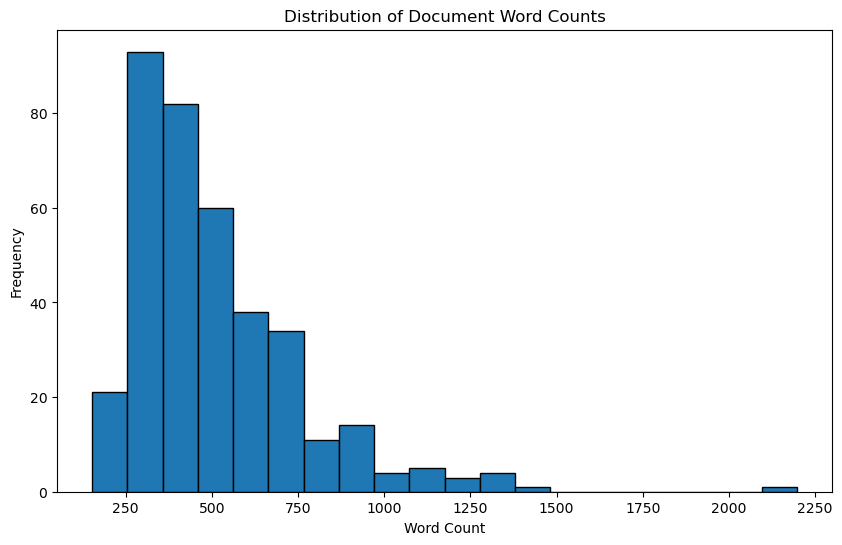

In [24]:
# Plot histogram for document lengths
plt.figure(figsize=(10,6))
plt.hist(df['doc_length'], bins=20, edgecolor='black')
plt.title("Distribution of Document Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

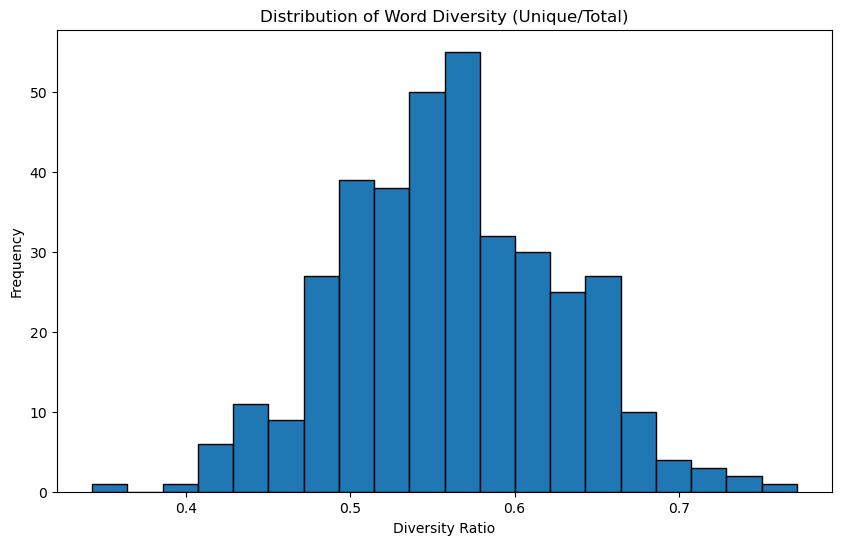

In [25]:
# Plot histogram for word diversity
plt.figure(figsize=(10,6))
plt.hist(df['word_diversity'], bins=20, edgecolor='black')
plt.title("Distribution of Word Diversity (Unique/Total)")
plt.xlabel("Diversity Ratio")
plt.ylabel("Frequency")
plt.show()

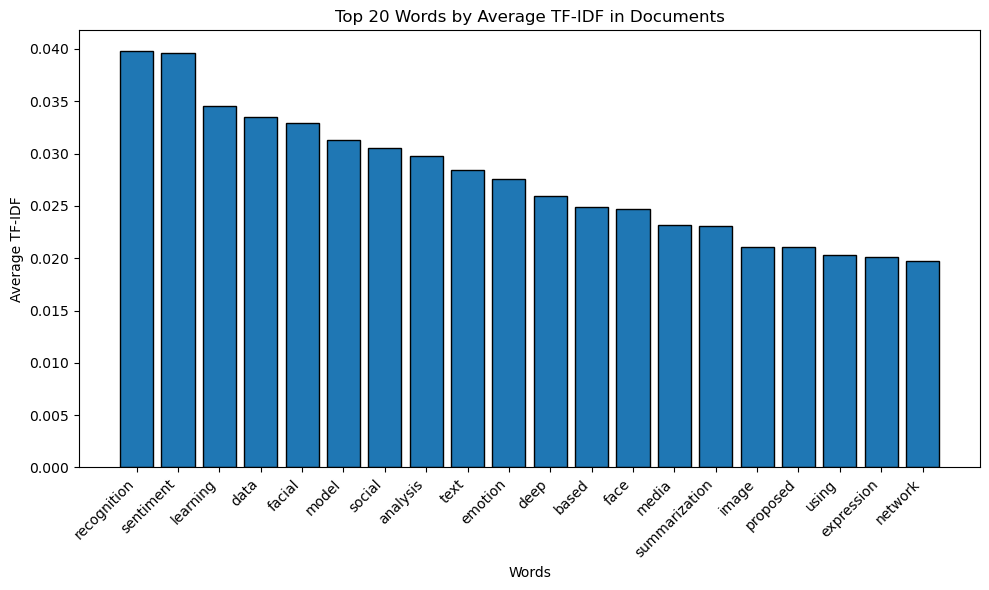

In [26]:
# TF-IDF Analysis
tfidf_vect = TfidfVectorizer(stop_words=stop_words)
X_tfidf = tfidf_vect.fit_transform(text_data)

# Compute average TF-IDF score for each word across the corpus
tfidf_avg = np.array(X_tfidf.mean(axis=0)).flatten()
vocab_tfidf = tfidf_vect.get_feature_names_out()
tfidf_df = pd.DataFrame({'word': vocab_tfidf, 'avg_tfidf': tfidf_avg})
tfidf_df = tfidf_df.sort_values(by='avg_tfidf', ascending=False)

# Plot top 20 words based on average TF-IDF
top_20_tfidf = tfidf_df.head(20)
plt.figure(figsize=(10,6))
plt.bar(top_20_tfidf['word'], top_20_tfidf['avg_tfidf'], edgecolor='black')
plt.title("Top 20 Words by Average TF-IDF in Documents")
plt.xlabel("Words")
plt.ylabel("Average TF-IDF")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

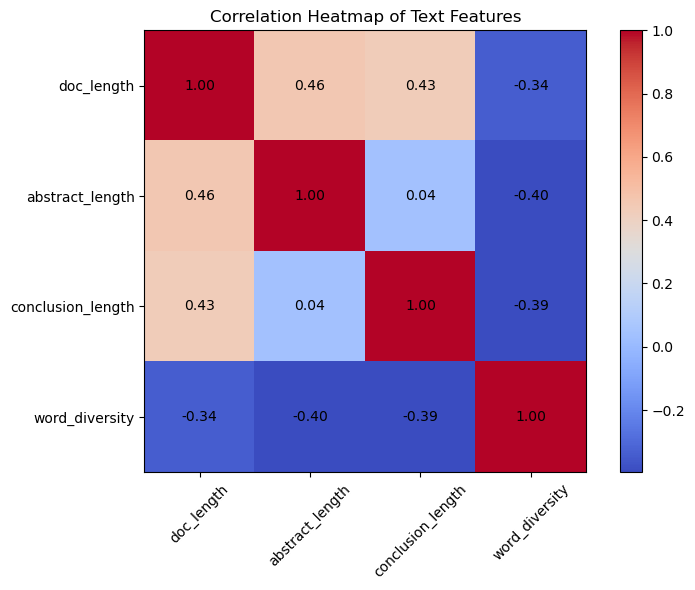

In [27]:
# Correlation Analysis between Text Features
# Prepare a correlation matrix for the numeric text features
features = df[['doc_length', 'abstract_length', 'conclusion_length', 'word_diversity']]
corr_matrix = features.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.title("Correlation Heatmap of Text Features")
# Annotate the heatmap with correlation coefficients
for (i, j), value in np.ndenumerate(corr_matrix.values):
    plt.text(j, i, f'{value:.2f}', ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

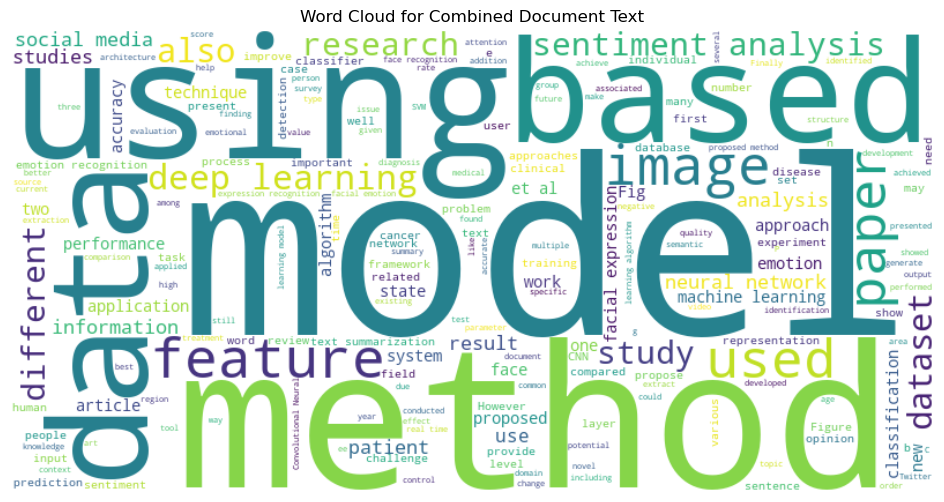

In [28]:
# Generate a Word Cloud for a Visual Overview
combined_text = " ".join(text_data)
wordcloud = WordCloud(width=800, height=400, stopwords=stop_words, background_color='white').generate(combined_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Combined Document Text")
plt.show()